In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('cleaned_data_pangan.csv')
data.tail()

,Tanggal,Beras,Beras Kualitas Bawah I (kg),Beras Kualitas Bawah II (kg),Beras Kualitas Medium I (kg),Beras Kualitas Medium II (kg),Beras Kualitas Super I (kg),Beras Kualitas Super II (kg),Bawang Merah,Bawang Merah Ukuran Sedang (kg),Bawang Putih,Bawang Putih Ukuran Sedang (kg),Cabai Merah,Cabai Merah Besar (kg),Cabai Merah Keriting (kg),Cabai Rawit,Cabai Rawit Hijau (kg),Cabai Rawit Merah (kg)
1365,2021-04-26,11750.0,10750.0,10450.0,11800.0,11600.0,13050.0,12700.0,33300.0,33300.0,30250.0,30250.0,43100.0,45050.0,42750.0,57050.0,48750.0,65900.0
1366,2021-04-27,11750.0,10750.0,10450.0,11800.0,11600.0,13050.0,12650.0,33250.0,33250.0,30200.0,30200.0,42000.0,44350.0,41650.0,56200.0,47750.0,65200.0
1367,2021-04-28,11750.0,10750.0,10450.0,11800.0,11600.0,13050.0,12650.0,33200.0,33200.0,30150.0,30150.0,41400.0,43500.0,41050.0,56000.0,47600.0,65150.0
1368,2021-04-29,11750.0,10750.0,10400.0,11750.0,11600.0,13050.0,12650.0,33100.0,33100.0,30250.0,30250.0,40700.0,43500.0,39950.0,55550.0,47500.0,64250.0
1369,2021-04-30,11750.0,10750.0,10400.0,11800.0,11550.0,13050.0,12650.0,33100.0,33100.0,30200.0,30200.0,40150.0,42950.0,39250.0,55000.0,46850.0,63850.0


In [3]:
data['Tanggal'] = pd.to_datetime(data['Tanggal'], infer_datetime_format=True)

In [4]:
data.columns = data.columns.str.replace(' ' , '_')

In [5]:
df1=data.reset_index()['Bawang_Merah']

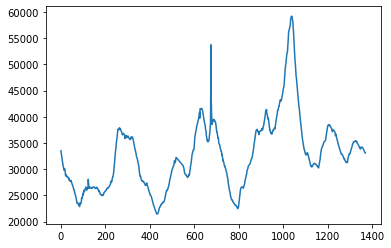

In [6]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [8]:
import numpy as np

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [11]:
training_size,test_size

(890, 480)

In [12]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [13]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [14]:
print(X_train.shape), print(y_train.shape)

(789, 100)
(789,)


(None, None)

In [15]:
print(X_test.shape), print(ytest.shape)

(379, 100)
(379,)


(None, None)

In [16]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [20]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf

In [47]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape=(100, 1), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(1))

In [48]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 128)          66560     
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 100, 128)          0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 128)          131584    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 100, 128)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 100, 128)          0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)               

In [49]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor= 'val_loss',
                                                 patience=3,
                                                 mode='min')

model.compile(loss=tf.losses.MeanSquaredError(), 
              optimizer='adam', 
             metrics = [tf.metrics.MeanAbsoluteError()])

history = model.fit(X_train,y_train, epochs = 50,
                    validation_data = (X_test,ytest),                    
                    shuffle = False,
                    batch_size = 64,
                    verbose = 1,
                    callbacks=[early_stopping])

Epoch 1/50
13/13 [==============================] - 10s 790ms/step - loss: 0.0163 - mean_absolute_error: 0.1027 - val_loss: 0.0218 - val_mean_absolute_error: 0.1029
Epoch 2/50
13/13 [==============================] - 8s 629ms/step - loss: 0.0046 - mean_absolute_error: 0.0519 - val_loss: 0.0059 - val_mean_absolute_error: 0.0587
Epoch 3/50
13/13 [==============================] - 8s 628ms/step - loss: 0.0070 - mean_absolute_error: 0.0614 - val_loss: 0.0272 - val_mean_absolute_error: 0.1422
Epoch 4/50
13/13 [==============================] - 8s 640ms/step - loss: 0.0110 - mean_absolute_error: 0.0818 - val_loss: 0.0045 - val_mean_absolute_error: 0.0493
Epoch 5/50
13/13 [==============================] - 8s 637ms/step - loss: 0.0057 - mean_absolute_error: 0.0584 - val_loss: 0.0050 - val_mean_absolute_error: 0.0459
Epoch 6/50
13/13 [==============================] - 8s 621ms/step - loss: 0.0030 - mean_absolute_error: 0.0405 - val_loss: 0.0057 - val_mean_absolute_error: 0.0482
Epoch 7/50
13/1

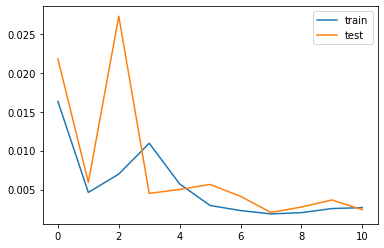

In [50]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [51]:
import tensorflow as tf

In [52]:
tf.__version__

'2.3.1'

In [53]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [54]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [55]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

31423.342053606848

In [56]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

39151.470859601

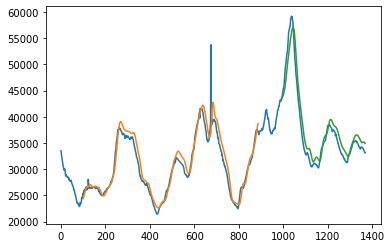

In [57]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [58]:
len(test_data)

480

In [59]:
x_input=test_data[380:].reshape(1,-1)
x_input.shape

(1, 100)

In [60]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [61]:
temp_input

[0.2900662251655629,
 0.2887417218543046,
 0.2847682119205298,
 0.28079470198675494,
 0.27682119205298017,
 0.2781456953642384,
 0.2794701986754967,
 0.27152317880794696,
 0.27019867549668874,
 0.26843267108167757,
 0.26666666666666683,
 0.26490066225165565,
 0.2635761589403973,
 0.2609271523178808,
 0.2622516556291391,
 0.25960264900662255,
 0.25960264900662255,
 0.25960264900662255,
 0.25960264900662255,
 0.2622516556291391,
 0.2728476821192053,
 0.28079470198675494,
 0.2850993377483444,
 0.28940397350993374,
 0.2937086092715232,
 0.29801324503311255,
 0.2993377483443709,
 0.304635761589404,
 0.30331125827814565,
 0.3019867549668874,
 0.3059602649006622,
 0.30993377483443707,
 0.31390728476821195,
 0.31920529801324504,
 0.3231788079470198,
 0.32582781456953636,
 0.328476821192053,
 0.33200883002207515,
 0.33554083885209707,
 0.3390728476821192,
 0.34304635761589397,
 0.3496688741721854,
 0.35231788079470194,
 0.3536423841059603,
 0.3571743929359824,
 0.3607064017660043,
 0.3642384105

In [62]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.3522596]
101
1 day input [0.28874172 0.28476821 0.2807947  0.27682119 0.2781457  0.2794702
 0.27152318 0.27019868 0.26843267 0.26666667 0.26490066 0.26357616
 0.26092715 0.26225166 0.25960265 0.25960265 0.25960265 0.25960265
 0.26225166 0.27284768 0.2807947  0.28509934 0.28940397 0.29370861
 0.29801325 0.29933775 0.30463576 0.30331126 0.30198675 0.30596026
 0.30993377 0.31390728 0.3192053  0.32317881 0.32582781 0.32847682
 0.33200883 0.33554084 0.33907285 0.34304636 0.34966887 0.35231788
 0.35364238 0.35717439 0.3607064  0.36423841 0.36556291 0.36423841
 0.36556291 0.36688742 0.36732892 0.36777042 0.36821192 0.36821192
 0.36821192 0.36556291 0.36953642 0.36865342 0.36777042 0.36688742
 0.3615894  0.3615894  0.3589404  0.35629139 0.35452539 0.35275938
 0.35099338 0.34966887 0.34701987 0.34304636 0.34072848 0.3384106
 0.33609272 0.33377483 0.33377483 0.32980132 0.32847682 0.32847682
 0.33200883 0.33554084 0.33907285 0.33774834 0.33774834 0.33774834
 0.33642384 0.33554084 0.33465784 0.

8 day output [[0.3653231]]
9 day input [0.26843267 0.26666667 0.26490066 0.26357616 0.26092715 0.26225166
 0.25960265 0.25960265 0.25960265 0.25960265 0.26225166 0.27284768
 0.2807947  0.28509934 0.28940397 0.29370861 0.29801325 0.29933775
 0.30463576 0.30331126 0.30198675 0.30596026 0.30993377 0.31390728
 0.3192053  0.32317881 0.32582781 0.32847682 0.33200883 0.33554084
 0.33907285 0.34304636 0.34966887 0.35231788 0.35364238 0.35717439
 0.3607064  0.36423841 0.36556291 0.36423841 0.36556291 0.36688742
 0.36732892 0.36777042 0.36821192 0.36821192 0.36821192 0.36556291
 0.36953642 0.36865342 0.36777042 0.36688742 0.3615894  0.3615894
 0.3589404  0.35629139 0.35452539 0.35275938 0.35099338 0.34966887
 0.34701987 0.34304636 0.34072848 0.3384106  0.33609272 0.33377483
 0.33377483 0.32980132 0.32847682 0.32847682 0.33200883 0.33554084
 0.33907285 0.33774834 0.33774834 0.33774834 0.33642384 0.33554084
 0.33465784 0.33377483 0.33112583 0.32847682 0.32450331 0.32317881
 0.3200883  0.31699779 0

16 day output [[0.4019935]]
17 day input [0.25960265 0.25960265 0.26225166 0.27284768 0.2807947  0.28509934
 0.28940397 0.29370861 0.29801325 0.29933775 0.30463576 0.30331126
 0.30198675 0.30596026 0.30993377 0.31390728 0.3192053  0.32317881
 0.32582781 0.32847682 0.33200883 0.33554084 0.33907285 0.34304636
 0.34966887 0.35231788 0.35364238 0.35717439 0.3607064  0.36423841
 0.36556291 0.36423841 0.36556291 0.36688742 0.36732892 0.36777042
 0.36821192 0.36821192 0.36821192 0.36556291 0.36953642 0.36865342
 0.36777042 0.36688742 0.3615894  0.3615894  0.3589404  0.35629139
 0.35452539 0.35275938 0.35099338 0.34966887 0.34701987 0.34304636
 0.34072848 0.3384106  0.33609272 0.33377483 0.33377483 0.32980132
 0.32847682 0.32847682 0.33200883 0.33554084 0.33907285 0.33774834
 0.33774834 0.33774834 0.33642384 0.33554084 0.33465784 0.33377483
 0.33112583 0.32847682 0.32450331 0.32317881 0.3200883  0.31699779
 0.31390728 0.31258278 0.31125828 0.30860927 0.30860927 0.35225961
 0.35050723 0.3497805

24 day output [[0.4363649]]
25 day input [0.29801325 0.29933775 0.30463576 0.30331126 0.30198675 0.30596026
 0.30993377 0.31390728 0.3192053  0.32317881 0.32582781 0.32847682
 0.33200883 0.33554084 0.33907285 0.34304636 0.34966887 0.35231788
 0.35364238 0.35717439 0.3607064  0.36423841 0.36556291 0.36423841
 0.36556291 0.36688742 0.36732892 0.36777042 0.36821192 0.36821192
 0.36821192 0.36556291 0.36953642 0.36865342 0.36777042 0.36688742
 0.3615894  0.3615894  0.3589404  0.35629139 0.35452539 0.35275938
 0.35099338 0.34966887 0.34701987 0.34304636 0.34072848 0.3384106
 0.33609272 0.33377483 0.33377483 0.32980132 0.32847682 0.32847682
 0.33200883 0.33554084 0.33907285 0.33774834 0.33774834 0.33774834
 0.33642384 0.33554084 0.33465784 0.33377483 0.33112583 0.32847682
 0.32450331 0.32317881 0.3200883  0.31699779 0.31390728 0.31258278
 0.31125828 0.30860927 0.30860927 0.35225961 0.35050723 0.34978059
 0.35019493 0.35169914 0.35414913 0.35735947 0.36114106 0.3653231
 0.36976284 0.37434578 

In [63]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [64]:
import matplotlib.pyplot as plt

In [65]:
len(df1)

1370

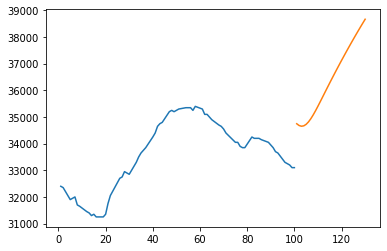

In [66]:
plt.plot(day_new,scaler.inverse_transform(df1[1270:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

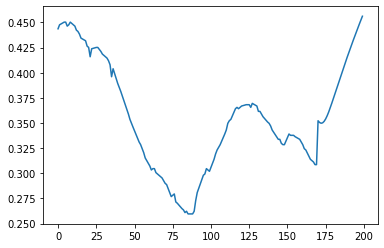

In [67]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [68]:
df3=scaler.inverse_transform(df3).tolist()

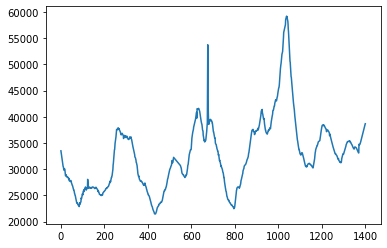

In [69]:
plt.plot(df3)